<a href="https://colab.research.google.com/github/Mobinulalamfaisal/GitTutorial/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







## Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from tqdm import tqdm
from collections import Counter

## Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS/international_matches.csv')

In [ ]:
df.head(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
print(df['date'].min())
print(df['date'].max())

1993-08-08
2022-06-14


In [ ]:
print(df['tournament'].unique())

['FIFA World Cup qualification' 'Friendly'
 'African Cup of Nations qualification' 'Amílcar Cabral Cup'
 'CFU Caribbean Cup qualification'
 'United Arab Emirates Friendship Tournament'
 'Malta International Tournament' 'Lunar New Year Cup'
 'African Cup of Nations' 'CFU Caribbean Cup' 'UEFA Euro qualification'
 'Kirin Cup' 'FIFA World Cup' 'Oceania Nations Cup qualification'
 'Baltic Cup' 'Gulf Cup' 'Simba Tournament' 'CECAFA Cup'
 'Confederations Cup' 'Dynasty Cup' "King's Cup" 'Nehru Cup' 'SAFF Cup'
 'Copa Paz del Chaco' 'Korea Cup' 'USA Cup' 'Copa América'
 'Merdeka Tournament' 'South Pacific Games' 'UNCAF Cup'
 'Oceania Nations Cup' 'Windward Islands Tournament' 'Gold Cup'
 'AFC Asian Cup qualification' 'UEFA Euro' 'AFF Championship'
 'AFC Asian Cup' 'King Hassan II Tournament'
 'Cyprus International Tournament' 'Dunhill Cup'
 'COSAFA Cup qualification' 'COSAFA Cup' 'Tournoi de France'
 'Gold Cup qualification' 'SKN Football Festival' 'Arab Cup qualification'
 'Arab Cup' 'UNIFFAC C

In [ ]:
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [ ]:
# Listing all columns which contains 'NaN' values
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]

In [ ]:
# Fill NaN cells with column mean
for x in teams_worldcup:
    for y in columns_contains_null:
         df[y].fillna(df[df[y[0:9]]==x][y].mean(), inplace=True)

## EDA

### Let's try to answer the following questions:
- What team has the strongest defense, midfield, and offense players?
- Is there really such a thing as a home team advantage?
- Do teams with stronger offense players score more goals? And do teams with stronger goalkeepers receive fewer goals?
- What team has the longest winning streak?
- Does the best team always win? Can you explain why a weaker team sometimes win?

### Heatmap

<ipython-input-13-fafe410d0c29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

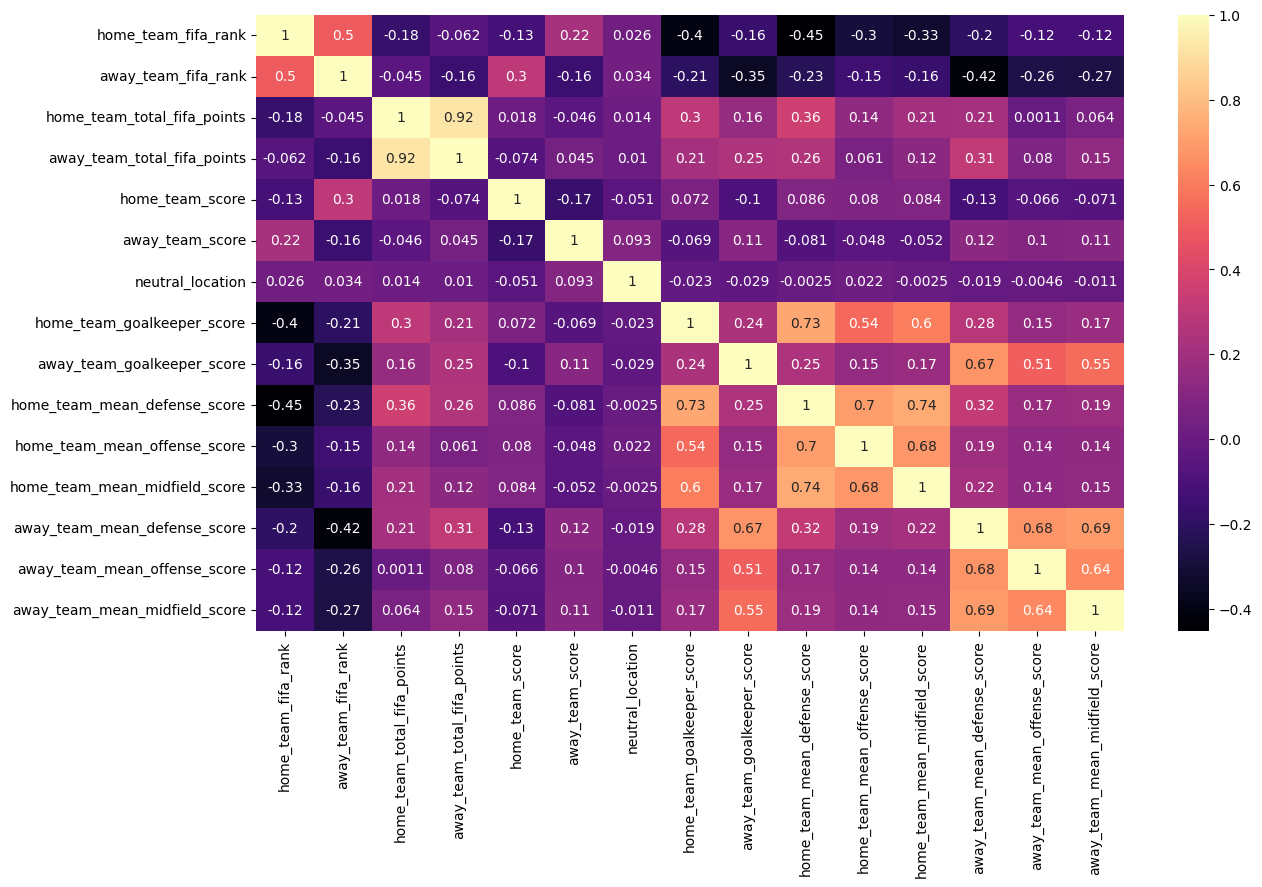

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(data=corr, annot=True, cmap='magma')

### Top 10 team ranking

In [ ]:
team_ranks = pd.DataFrame({'Team':teams_worldcup})
team_ranks['Rank'] = team_ranks['Team'].apply(lambda x: df.loc[((df['home_team'] == x) | (df['away_team'] == x)), ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'date']].sort_values('date', ascending=False).iloc[0]['home_team_fifa_rank'] if df.loc[((df['home_team'] == x) | (df['away_team'] == x)), ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'date']].sort_values('date', ascending=False).iloc[0]['home_team'] == x else df.loc[((df['home_team'] == x) | (df['away_team'] == x)), ['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'date']].sort_values('date', ascending=False).iloc[0]['away_team_fifa_rank'])
team_ranks = team_ranks.sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1

print('\nTop 10 team ranking:\n' )
team_ranks[:10]


Top 10 team ranking:



,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


In [ ]:
colors = ['goldenrod', 'crimson', 'gray', 'deepskyblue', 'darkorange', 'mediumblue', 'purple', 'forestgreen', 'indigo', 'darkred']

fig = go.Figure(data=[go.Bar(x=team_ranks['Team'][:10], y=team_ranks['Rank'][:10], text=team_ranks['Rank'][:10], textposition='auto', marker_color=colors)])
fig.update_layout(title_text='Top 10 Team Ranking', xaxis_title='Team', yaxis_title='Rank')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=team_ranks['Team'][:10], y=team_ranks['Rank'][:10], text=team_ranks['Rank'][:10], textposition='auto')])
fig.update_layout(title_text='Top 10 Team Ranking', xaxis_title='Team', yaxis_title='Rank')
fig.show()

### TOP 10 GOALKEEPER SCORE

In [ ]:
gk_scores = pd.DataFrame({'Team':teams_worldcup})
gk_scores['Gk score'] = gk_scores['Team'].apply(lambda x: np.round(((df[df["home_team"]==x]['home_team_goalkeeper_score'].mean() + df[df["away_team"]==x]['away_team_goalkeeper_score'].mean())/2), 2))
gk_scores = gk_scores.sort_values('Gk score', ascending=False).reset_index(drop=True)
gk_scores.index += 1
print('Top Goalkeepers:')
gk_scores

Top Goalkeepers:


,Team,Gk score
1,Spain,83.06
2,Germany,82.27
3,France,81.20
4,Brazil,79.82
5,England,79.11
6,Netherlands,79.03
7,Belgium,78.55
8,Portugal,78.42
9,Poland,78.18
10,USA,77.35


In [ ]:
fig = px.bar(gk_scores[:10], x='Team', y='Gk score', labels={'Team':'TEAM', 'Gk score':'SCORE'})
fig.update_layout(title='TOP 10 GOALKEEPER SCORE')
fig.show()

###  Defence score

In [ ]:
def_scores = pd.DataFrame({'Team': teams_worldcup, 'Def Score': [np.round(((df[df["home_team"]==x]['home_team_mean_defense_score'].mean() + df[df["away_team"]==x]['away_team_mean_defense_score'].mean())/2), 2) for x in teams_worldcup]}).sort_values('Def Score', ascending=False).reset_index(drop=True)
def_scores.index += 1
def_scores

,Team,Def Score
1,Spain,80.64
2,Serbia,80.23
3,England,79.80
4,Germany,79.32
5,Brazil,79.31
6,France,79.19
7,Portugal,78.92
8,Argentina,78.48
9,Belgium,77.54
10,Netherlands,77.17


In [ ]:
def_scores = pd.DataFrame({'Team': teams_worldcup, 'Def Score': [np.round(((df[df["home_team"]==x]['home_team_mean_defense_score'].mean() + df[df["away_team"]==x]['away_team_mean_defense_score'].mean())/2), 2) for x in teams_worldcup]}).sort_values('Def Score', ascending=False).reset_index(drop=True)
def_scores_top10 = def_scores[:10]

fig = go.Figure(data=[go.Bar(x=def_scores_top10['Team'], y=def_scores_top10['Def Score'], text=def_scores_top10['Def Score'], textposition='auto')])
fig.update_layout(title_text='Top 10 Teams Based on Defense Score', xaxis_title='Team', yaxis_title='Defense Score')
fig.show()

### Offence score

In [ ]:
offence_scores = pd.DataFrame({'Team': teams_worldcup, 'Of score': [(df[df["home_team"]==x]['home_team_mean_offense_score'].mean() + df[df["away_team"]==x]['away_team_mean_offense_score'].mean())/2 for x in teams_worldcup]}).sort_values('Of score', ascending=False).reset_index(drop=True)
offence_scores.index += 1
offence_scores

,Team,Of score
1,Argentina,83.509548
2,Spain,82.408200
3,France,81.911625
4,Netherlands,81.881673
5,Portugal,81.808575
6,England,81.687719
7,Brazil,81.677376
8,Uruguay,80.554292
9,Germany,80.427180
10,Belgium,79.480064


In [ ]:
top_10_offense = offence_scores.head(10)

fig = px.bar(top_10_offense, x='Team', y='Of score', title='Top 10 teams based on offense score')
fig.show()

### Midfield score

In [ ]:
midfield_scores = pd.DataFrame({'Team': teams_worldcup, 'Md score': [(df[df["home_team"]==x]['home_team_mean_midfield_score'].mean() + df[df["away_team"]==x]['away_team_mean_midfield_score'].mean())/2 for x in teams_worldcup]}).sort_values('Md score', ascending=False).reset_index(drop=True)
midfield_scores.index += 1
midfield_scores

,Team,Md score
1,Spain,83.106822
2,France,82.041581
3,Germany,81.620281
4,England,81.163504
5,Argentina,80.938923
6,Brazil,80.817811
7,Portugal,80.766240
8,Netherlands,80.584135
9,Serbia,80.309502
10,Belgium,79.203736


In [ ]:
fig = px.bar(midfield_scores.head(10), x='Team', y='Md score', title='Top 10 teams based on midfield score')

fig.show()

### Goals

In [ ]:
goals = pd.DataFrame({'Team':teams_worldcup})
for team in teams_worldcup:
    home = df[df['home_team']== team]
    away = df[df['away_team']== team]

    goals.loc[goals['Team'] == team, 'Scored goals home'] = home['home_team_score'].sum()
    goals.loc[goals['Team'] == team, 'Conceded goals home'] = home['away_team_score'].sum()
    goals.loc[goals['Team'] == team, 'Scored goals away'] = away['away_team_score'].sum()
    goals.loc[goals['Team'] == team, 'Conceded goals away'] = away['home_team_score'].sum()

goals['Total scored goals'] = goals['Scored goals home'] + goals['Scored goals away']
goals['Total conceded goals'] = goals['Conceded goals home'] + goals['Conceded goals away']
goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1
goals[:10]

,Team,Scored goals home,Conceded goals home,Scored goals away,Conceded goals away,Total scored goals,Total conceded goals,Goal difference,Goal ratio
1,Brazil,558.0,141.0,396.0,159.0,954.0,300.0,654.0,3.180000
2,Spain,469.0,107.0,312.0,141.0,781.0,248.0,533.0,3.149194
3,Germany,544.0,220.0,331.0,171.0,875.0,391.0,484.0,2.237852
4,IR Iran,425.0,115.0,288.0,165.0,713.0,280.0,433.0,2.546429
5,Netherlands,426.0,145.0,274.0,142.0,700.0,287.0,413.0,2.439024
6,France,447.0,154.0,223.0,112.0,670.0,266.0,404.0,2.518797
7,Portugal,424.0,124.0,244.0,144.0,668.0,268.0,400.0,2.492537
8,England,384.0,132.0,246.0,119.0,630.0,251.0,379.0,2.509960
9,Japan,533.0,273.0,243.0,153.0,776.0,426.0,350.0,1.821596
10,Mexico,572.0,272.0,286.0,247.0,858.0,519.0,339.0,1.653179


In [ ]:
fig = go.Figure(data=[go.Bar(x=goals['Team'][:10], y=goals['Goal difference'][:10])])
fig.update_layout(title='Top 10 Teams with Best Goal Difference', xaxis_title='TEAM', yaxis_title='GOAL DIFFERENCE')

fig.show()

### Better team win percentage

In [ ]:
away_win_pct = df.loc[df['home_team_fifa_rank'] > df['away_team_fifa_rank'], 'home_team_result'].value_counts(normalize=True)[0]
home_win_pct = df.loc[df['home_team_fifa_rank'] < df['away_team_fifa_rank'], 'home_team_result'].value_counts(normalize=True)[0]
total_win_pct = df.loc[df['home_team_fifa_rank'] != df['away_team_fifa_rank'], 'home_team_result'].value_counts(normalize=True)[0]

data = {'win percent': [home_win_pct, away_win_pct, total_win_pct]}
better_team_win_percent = pd.DataFrame(data, index=['home', 'away', 'total'])

better_team_win_percent

,win percent
home,0.657882
away,0.442904
total,0.491523


In [ ]:
fig = px.bar(better_team_win_percent, x=better_team_win_percent.index, y='win percent')
fig.update_traces(texttemplate='%{y:.2f}%', textposition='inside')
fig.update_layout(xaxis_title='Team Better', yaxis_title='Win Percent', title='Better team win percentage', xaxis={'categoryorder': 'array', 'categoryarray': ['home', 'away', 'total']},)
fig.show()

## Preprocess

In [ ]:
teams_worldcup

['Qatar',
 'Ecuador',
 'Senegal',
 'Netherlands',
 'England',
 'IR Iran',
 'USA',
 'Wales',
 'Argentina',
 'Saudi Arabia',
 'Mexico',
 'Poland',
 'France',
 'Australia',
 'Denmark',
 'Tunisia',
 'Spain',
 'Costa Rica',
 'Germany',
 'Japan',
 'Belgium',
 'Canada',
 'Morocco',
 'Croatia',
 'Brazil',
 'Serbia',
 'Switzerland',
 'Cameroon',
 'Portugal',
 'Ghana',
 'Uruguay',
 'Korea Republic']

finding the missing values


In [ ]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
print("Column number having missing values: ", len(features_with_na))

Column number having missing values:  0


Listing all columns which contains 'NaN' values

In [ ]:
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'Columns contain \'null\' values: \n\n{columns_contains_null}')

Columns contain 'null' values: 

[]


## Feature Engineering

In [ ]:
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['is_stake'] = df['tournament'] != 'Friendly'
df['is_worldcup'] = 'FIFA World Cup' in df['tournament']

df['score_difference'] = df['home_team_score'] - df['away_team_score'] # Note that this feature is not used in training
df['is_won'] = df['score_difference'] > 0 # Take draw as lost

In [ ]:
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake', 'is_worldcup']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=20)

In [ ]:
X_train.head()

,average_rank,rank_difference,point_difference,is_stake,is_worldcup
18124,12.5,15,-308,True,False
4589,21.5,-17,0,False,False
21745,86.5,85,-334,True,False
9341,145.5,3,0,True,False
18724,26.5,5,-23,True,False


## Model Training

Logistic Regression


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

68.18

 Support Vector Machines


In [ ]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

68.1

KNN

In [ ]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
svm_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

64.5

Xgboost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_test, y_test) * 100, 2)
acc_xgb

66.63

Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

62.65

Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

59.34

Benchmark Score

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'XGBoost', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_xgb, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Logistic Regression,68.18
0,Support Vector Machines,68.10
2,XGBoost,66.63
1,KNN,64.50
4,Random Forest,62.65
5,Decision Tree,59.34


## Evaluation

In [ ]:
pred_prob_lg = logreg.predict_proba(X_test)
pred_prob_knn = knn.predict_proba(X_test)
pred_prob_svc = svc.predict_proba(X_test)
pred_prob_xgb = xgb.predict_proba(X_test)
pred_prob_dt = decision_tree.predict_proba(X_test)
pred_prob_rf = random_forest.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_lg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_svc[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_xgb[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

fig = go.Figure()
fig.add_trace(go.Scatter(x=p_fpr, y=p_tpr,
                    mode='lines', name='Random',
                    line=dict(color='black', dash='dash')))
fig.add_trace(go.Scatter(x=fpr1, y=tpr1,
                    mode='lines', name='Logistic Regression',
                    line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=fpr2, y=tpr2,
                    mode='lines', name='KNN',
                    line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=fpr3, y=tpr3,
                    mode='lines', name='SVM',
                    line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=fpr4, y=tpr4,
                    mode='lines', name='Decision Tree',
                    line=dict(color='darkorange', dash='dash')))
fig.add_trace(go.Scatter(x=fpr5, y=tpr5,
                    mode='lines', name='Random Forest',
                    line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=fpr6, y=tpr6,
                    mode='lines', name='XGBoost',
                    line=dict(color='steelblue', dash='dash')))

fig.update_layout(title='ROC curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive rate')
fig.show()


## Match simulation

In [ ]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(teams_worldcup) & (df['date']>'2021-01-01')] #Get last 2 years of information (try to get all time too, get interesting results!)
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(teams_worldcup)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

world_cup_rankings_away.head(13)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,5.875000,1717.500000
Australia,36.428571,1477.571429
Belgium,1.181818,1810.818182
Brazil,1.888889,1810.444444
Cameroon,49.428571,1431.857143
Canada,55.866667,1400.000000
Costa Rica,45.857143,1440.928571
Croatia,15.600000,1607.800000
Denmark,10.500000,1640.000000


In [ ]:
simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

model = logreg
n_simulations = 1000

for j in tqdm(range(n_simulations)):
    candidates = ['Netherlands', 'USA', 'Argentina', 'Australia', 'France', 'Poland', 'England', 'Senegal', 'Japan', 'Croatia', 'Brazil', 'Korea Republic', 'Morocco', 'Spain', 'Portugal', 'Switzerland']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []
        prob = []
        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan,np.nan,True, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)
        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)

        if f == 'final':    
            step_final = ['final'] * 1
            candidates_final = zip(step_final,winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            simulation_winners.append(df_candidates_final)
            simulation_results_winners.append(winners)

        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 

df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_winners)

df_results = pd.concat([df_candidates_round_16,df_candidates_quarterfinal,df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulations_winners = sum(simulation_results_winners, [])

100%|██████████| 1000/1000 [00:34<00:00, 29.13it/s]


In [ ]:
lst_results = [simulation_results_round16,simulation_results_quarterfinal,simulation_results_semifinal,simulations_winners]

for i in lst_results:
    results = Counter(i).most_common()
    x,y = zip(*results)
    y = list(y)
    x = list(x)

    if i == simulation_results_round16:
        title = 'Round of 16'
    elif i == simulation_results_quarterfinal:
        title = 'Quarter Final'
    elif i == simulation_results_semifinal:
        title = 'Semi Final '
    elif i == simulations_winners:
        title = 'Final'

    fig = go.Figure(go.Bar(
        x=y, 
        y=x,
        orientation='h'
    ))

    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title="Frequency",
        yaxis_title="Team",
        height=600,
        width=1000,
        margin=dict(l=150, r=50, t=50, b=50)
    )
    
    fig.show()


## Pipeline

# The END